In [1]:
import numpy as np 
import pandas as pd
import matplotlib as plt

import csv
import matplotlib.pyplot as plt
from sklearn import (
    linear_model, metrics, pipeline, model_selection
)
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf

import linearmodels

#import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.patches as mpatches

In [2]:
import os
os.getcwd()

'C:\\Users\\jonah\\Documents\\Schoolwork\\ECON 594\\ECON_594_WD'

In [3]:
dist_80_df = pd.read_csv("two_by_two_dist_dfs\centroid_dist_80.csv")
dist_80_df.head(1)

,fid,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,GISJOIN,Shape_area,Shape_len,HubName,HubDist
0,1,6,83,2402,6083002402,24.02,Census Tract 24.02,G5020,S,16288573,44468,34.928796,-120.478083,G0600830002402,1.633304e+07,19109.934868,US - 275,29.120254


In [4]:
dist_80_canc_df = pd.read_csv("two_by_two_dist_dfs\centroid_dist_80_canc.csv")
dist_80_canc_df.head(1)

,fid,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,GISJOIN,Shape_area,Shape_len,HubName,HubDist
0,1,6,83,2402,6083002402,24.02,Census Tract 24.02,G5020,S,16288573,44468,34.928796,-120.478083,G0600830002402,1.633304e+07,19109.934868,US - 513,798.233364


In [5]:
dist_80_comm_op_df = pd.read_csv("two_by_two_dist_dfs\centroid_dist_comm_op_2.csv")
dist_80_comm_op_df.head(1)

,fid,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,GISJOIN,Shape_area,Shape_len,HubName,HubDist
0,1,6,83,2402,6083002402,24.02,Census Tract 24.02,G5020,S,16288573,44468,34.928796,-120.478083,G0600830002402,1.633304e+07,19109.934868,US - 275,29.120254


# Making sure their entities are similar

In [6]:
dist_80_df.describe()

,fid,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,Shape_area,Shape_len,HubDist
count,95728.000000,95728.000000,95728.000000,95728.000000,9.572800e+04,95728.000000,9.572800e+04,9.572800e+04,95728.000000,95728.000000,9.572800e+04,9.572800e+04,95728.000000
mean,47864.500000,27.586808,84.977499,277797.564453,2.767206e+10,2777.975645,5.474771e+08,2.109357e+08,36.850288,-90.726276,5.686140e+08,2.148538e+05,153.633448
std,27634.437622,16.321692,96.985392,368730.247466,1.634253e+10,3687.302475,6.505875e+09,1.332522e+09,6.617158,18.907204,6.587599e+09,6.552213e+05,264.133326
min,1.000000,1.000000,1.000000,100.000000,1.001020e+09,1.000000,0.000000e+00,0.000000e+00,17.940385,-175.860041,8.298574e+03,4.708613e+02,0.341934
25%,23932.750000,12.000000,29.000000,10400.000000,1.210302e+10,104.000000,2.359364e+06,0.000000e+00,32.582159,-97.189936,2.409749e+06,7.347770e+03,54.615007
50%,47864.500000,26.000000,65.000000,50104.000000,2.606395e+10,501.040000,1.009852e+07,1.772355e+05,37.732552,-86.236943,1.041637e+07,1.845738e+04,89.979891
75%,71796.250000,41.000000,107.000000,520201.250000,4.100526e+10,5202.012500,1.245380e+08,7.071705e+06,41.340436,-79.203881,1.278320e+08,8.835463e+04,138.714140
max,95728.000000,72.000000,840.000000,991703.000000,7.215375e+10,9917.030000,2.212516e+11,2.401046e+10,71.287816,178.338813,2.229772e+11,6.379208e+06,3192.242374


In [7]:
print(len(dist_80_df["GEOID10"].unique()))
print(len(dist_80_canc_df["GEOID10"].unique()))
print(len(dist_80_comm_op_df["GEOID10"].unique()))

73625
73625
73625


In [8]:
print(len(dist_80_df["TRACTCE10"].unique()))
print(len(dist_80_canc_df["TRACTCE10"].unique()))
print(len(dist_80_comm_op_df["TRACTCE10"].unique()))

23932
23932
23932


In [9]:
print(len(dist_80_df["GISJOIN"].unique()))
print(len(dist_80_canc_df["GISJOIN"].unique()))
print(len(dist_80_comm_op_df["GISJOIN"].unique()))

73625
73625
73625


In [10]:
print(len(dist_80_df["NAMELSAD10"].unique()))
print(len(dist_80_canc_df["NAMELSAD10"].unique()))
print(len(dist_80_comm_op_df["NAMELSAD10"].unique()))

23932
23932
23932


In [11]:
print(len(dist_80_df["HubDist"].unique()))
print(len(dist_80_canc_df["HubDist"].unique()))
print(len(dist_80_comm_op_df["HubDist"].unique()))

95728
95728
95728


In [12]:
print(dist_80_df["GEOID10"].equals(dist_80_canc_df["GEOID10"]))
print(dist_80_df["GEOID10"].equals(dist_80_comm_op_df["GEOID10"]))
print(dist_80_canc_df["GEOID10"].equals(dist_80_comm_op_df["GEOID10"]))

True
True
True


# Checking if all in same order

In [13]:
dist_80_df["fid"].equals(dist_80_canc_df["fid"])

True

In [14]:
dist_80_df["fid"].equals(dist_80_comm_op_df["fid"])

True

In [15]:
dist_80_comm_op_df["fid"].equals(dist_80_canc_df["fid"])

True

In [16]:
print(dist_80_df["GEOID10"].equals(dist_80_canc_df["GEOID10"]))
print(dist_80_df["GEOID10"].equals(dist_80_comm_op_df["GEOID10"]))
print(dist_80_canc_df["GEOID10"].equals(dist_80_comm_op_df["GEOID10"]))

True
True
True


I conclude the tracts are all in the same order, so I can join columns as I please.

# `model_df`

In [17]:
model_df = pd.DataFrame()
model_df["dist_80"] = dist_80_df["HubDist"]
model_df["dist_90_comm_op"] = dist_80_comm_op_df["HubDist"]
model_df["dist_90_canc"] = dist_80_canc_df["HubDist"]
model_df["GEOID10"] = dist_80_df["GEOID10"]
model_df["NAME10"] = dist_80_df["NAME10"]
model_df["NAMELSAD10"] = dist_80_df["NAMELSAD10"]
model_df["GISJOIN"] = dist_80_df["GISJOIN"]
model_df["Shape_area"] = dist_80_df["Shape_area"]
model_df

,dist_80,dist_90_comm_op,dist_90_canc,GEOID10,NAME10,NAMELSAD10,GISJOIN,Shape_area
0,29.120254,29.120254,798.233364,6083002402,24.02,Census Tract 24.02,G0600830002402,1.633304e+07
1,30.580460,30.580460,797.574235,6083002102,21.02,Census Tract 21.02,G0600830002102,1.352547e+06
2,33.690001,33.690001,802.380565,6083002009,20.09,Census Tract 20.09,G0600830002009,2.603279e+06
3,33.140878,33.140878,801.414996,6083002008,20.08,Census Tract 20.08,G0600830002008,3.295312e+06
4,288.664191,288.664191,512.461022,6011000500,5.00,Census Tract 5,G0600110000500,1.745037e+08
...,...,...,...,...,...,...,...,...
95723,175.508231,175.508231,175.508231,53065950100,9501.00,Census Tract 9501,G5300650950100,1.810400e+09
95724,142.829075,142.829075,142.829075,53047970500,9705.00,Census Tract 9705,G5300470970500,1.041799e+09
95725,121.602712,180.096979,121.602712,53057951200,9512.00,Census Tract 9512,G5300570951200,7.658436e+08
95726,131.866075,190.857904,131.866075,53057951000,9510.00,Census Tract 9510,G5300570951000,3.747954e+08


In [18]:
print(model_df["Shape_area"].nunique())
print(model_df["GISJOIN"].nunique())
print(model_df["dist_80"].nunique())

73625
73625
95728


Still conflicting information on how many tracts are identified.

# Importing LTDB Values

In [19]:
ltdb_values = pd.read_csv("Outcome Values/ltdb_value_8090_joined.csv", na_values=["", " "])
ltdb_values

,field_1,TRTID10,state_x,county_x,tract_x,MHMVAL80,MHMVAL90,Valid output_STATEFP10,Valid output_COUNTYFP10,Valid output_GEOID10,...,Valid output_NAMELSAD10,Valid output_MTFCC10,Valid output_FUNCSTAT10,Valid output_ALAND10,Valid output_AWATER10,Valid output_INTPTLAT10,Valid output_INTPTLON10,Valid output_GISJOIN,Valid output_Shape_area,Valid output_Shape_len
0,1,6083002402,CA,Santa Barbara County,Census Tract 24.02,65120.99963,144999.99920,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1001020200,AL,Autauga County,Census Tract 202,26837.00034,43600.00056,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,6083002102,CA,Santa Barbara County,Census Tract 21.02,66500.00045,157600.00070,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,6083002009,CA,Santa Barbara County,Census Tract 20.09,78422.00169,184097.26050,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,1001020400,AL,Autauga County,Census Tract 204,43843.99975,67299.99962,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55986,59182,26081011804,MI,Kent County,Census Tract 118.04,58685.99943,102400.00330,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55987,59183,26077002901,MI,Kalamazoo County,Census Tract 29.01,45606.85763,64899.78331,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55988,59184,26077002903,MI,Kalamazoo County,Census Tract 29.03,58217.46546,72088.25791,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55989,59185,47149040810,TN,Rutherford County,Census Tract 408.10,40642.00092,60999.99927,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
ltdb_values
ltdb_values.dropna(subset = ['MHMVAL80'], inplace = True)     # Remove rows with NaN
ltdb_values.dropna(subset = ['MHMVAL90'], inplace = True)     # Remove rows with NaN
ltdb_values


,field_1,TRTID10,state_x,county_x,tract_x,MHMVAL80,MHMVAL90,Valid output_STATEFP10,Valid output_COUNTYFP10,Valid output_GEOID10,...,Valid output_NAMELSAD10,Valid output_MTFCC10,Valid output_FUNCSTAT10,Valid output_ALAND10,Valid output_AWATER10,Valid output_INTPTLAT10,Valid output_INTPTLON10,Valid output_GISJOIN,Valid output_Shape_area,Valid output_Shape_len
0,1,6083002402,CA,Santa Barbara County,Census Tract 24.02,65120.99963,144999.99920,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1001020200,AL,Autauga County,Census Tract 202,26837.00034,43600.00056,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,6083002102,CA,Santa Barbara County,Census Tract 21.02,66500.00045,157600.00070,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,6083002009,CA,Santa Barbara County,Census Tract 20.09,78422.00169,184097.26050,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,1001020400,AL,Autauga County,Census Tract 204,43843.99975,67299.99962,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55986,59182,26081011804,MI,Kent County,Census Tract 118.04,58685.99943,102400.00330,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55987,59183,26077002901,MI,Kalamazoo County,Census Tract 29.01,45606.85763,64899.78331,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55988,59184,26077002903,MI,Kalamazoo County,Census Tract 29.03,58217.46546,72088.25791,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55989,59185,47149040810,TN,Rutherford County,Census Tract 408.10,40642.00092,60999.99927,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#ltdb_new = ltdb_values.copy()                          # Create duplicate of data
#ltdb_new.dropna(subset = ['MHMVAL70'], inplace = True)     # Remove rows with NaN
#ltdb_new.dropna(subset = ['MHMVAL80'], inplace = True)     # Remove rows with NaN
#ltdb_new

In [22]:
#ltdb_new["MHMVAL80"].astype(float)

In [23]:
ltdb_values["MHMVAL90"].astype(float)

0        144999.99920
1         43600.00056
2        157600.00070
3        184097.26050
4         67299.99962
             ...     
55986    102400.00330
55987     64899.78331
55988     72088.25791
55989     60999.99927
55990     71300.08319
Name: MHMVAL90, Length: 55991, dtype: float64

# `model_df` `ltdb_values` join attempt 1

In [24]:
model_df

,dist_80,dist_90_comm_op,dist_90_canc,GEOID10,NAME10,NAMELSAD10,GISJOIN,Shape_area
0,29.120254,29.120254,798.233364,6083002402,24.02,Census Tract 24.02,G0600830002402,1.633304e+07
1,30.580460,30.580460,797.574235,6083002102,21.02,Census Tract 21.02,G0600830002102,1.352547e+06
2,33.690001,33.690001,802.380565,6083002009,20.09,Census Tract 20.09,G0600830002009,2.603279e+06
3,33.140878,33.140878,801.414996,6083002008,20.08,Census Tract 20.08,G0600830002008,3.295312e+06
4,288.664191,288.664191,512.461022,6011000500,5.00,Census Tract 5,G0600110000500,1.745037e+08
...,...,...,...,...,...,...,...,...
95723,175.508231,175.508231,175.508231,53065950100,9501.00,Census Tract 9501,G5300650950100,1.810400e+09
95724,142.829075,142.829075,142.829075,53047970500,9705.00,Census Tract 9705,G5300470970500,1.041799e+09
95725,121.602712,180.096979,121.602712,53057951200,9512.00,Census Tract 9512,G5300570951200,7.658436e+08
95726,131.866075,190.857904,131.866075,53057951000,9510.00,Census Tract 9510,G5300570951000,3.747954e+08


In [25]:
ltdb_values.columns
ltdb_values.head(1)

,field_1,TRTID10,state_x,county_x,tract_x,MHMVAL80,MHMVAL90,Valid output_STATEFP10,Valid output_COUNTYFP10,Valid output_GEOID10,...,Valid output_NAMELSAD10,Valid output_MTFCC10,Valid output_FUNCSTAT10,Valid output_ALAND10,Valid output_AWATER10,Valid output_INTPTLAT10,Valid output_INTPTLON10,Valid output_GISJOIN,Valid output_Shape_area,Valid output_Shape_len
0,1,6083002402,CA,Santa Barbara County,Census Tract 24.02,65120.99963,144999.9992,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
ltdb_values["GISJOIN"] = ltdb_values["Valid output_GISJOIN"]
ltdb_values["GEOID10"] = ltdb_values["TRTID10"]
ltdb_values["GEOID10"]

0         6083002402
1         1001020200
2         6083002102
3         6083002009
4         1001020400
            ...     
55986    26081011804
55987    26077002901
55988    26077002903
55989    47149040810
55990    53073010100
Name: GEOID10, Length: 55991, dtype: int64

In [27]:
ltdb_values

,field_1,TRTID10,state_x,county_x,tract_x,MHMVAL80,MHMVAL90,Valid output_STATEFP10,Valid output_COUNTYFP10,Valid output_GEOID10,...,Valid output_FUNCSTAT10,Valid output_ALAND10,Valid output_AWATER10,Valid output_INTPTLAT10,Valid output_INTPTLON10,Valid output_GISJOIN,Valid output_Shape_area,Valid output_Shape_len,GISJOIN,GEOID10
0,1,6083002402,CA,Santa Barbara County,Census Tract 24.02,65120.99963,144999.99920,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6083002402
1,2,1001020200,AL,Autauga County,Census Tract 202,26837.00034,43600.00056,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1001020200
2,3,6083002102,CA,Santa Barbara County,Census Tract 21.02,66500.00045,157600.00070,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6083002102
3,5,6083002009,CA,Santa Barbara County,Census Tract 20.09,78422.00169,184097.26050,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6083002009
4,6,1001020400,AL,Autauga County,Census Tract 204,43843.99975,67299.99962,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1001020400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55986,59182,26081011804,MI,Kent County,Census Tract 118.04,58685.99943,102400.00330,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26081011804
55987,59183,26077002901,MI,Kalamazoo County,Census Tract 29.01,45606.85763,64899.78331,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26077002901
55988,59184,26077002903,MI,Kalamazoo County,Census Tract 29.03,58217.46546,72088.25791,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26077002903
55989,59185,47149040810,TN,Rutherford County,Census Tract 408.10,40642.00092,60999.99927,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47149040810


In [28]:
ltdb_values["GEOID10"].isna().sum()

0

In [29]:
model_df["GEOID10"].isna().sum()

0

In [30]:
joined_model_df = model_df.merge(ltdb_values, on= "GEOID10")
joined_model_df

,dist_80,dist_90_comm_op,dist_90_canc,GEOID10,NAME10,NAMELSAD10,GISJOIN_x,Shape_area,field_1,TRTID10,...,Valid output_MTFCC10,Valid output_FUNCSTAT10,Valid output_ALAND10,Valid output_AWATER10,Valid output_INTPTLAT10,Valid output_INTPTLON10,Valid output_GISJOIN,Valid output_Shape_area,Valid output_Shape_len,GISJOIN_y
0,29.120254,29.120254,798.233364,6083002402,24.02,Census Tract 24.02,G0600830002402,1.633304e+07,1,6083002402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30.580460,30.580460,797.574235,6083002102,21.02,Census Tract 21.02,G0600830002102,1.352547e+06,3,6083002102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,33.690001,33.690001,802.380565,6083002009,20.09,Census Tract 20.09,G0600830002009,2.603279e+06,5,6083002009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,86.545541,86.545541,897.510800,6083980100,9801.00,Census Tract 9801,G0600830980100,5.067002e+08,24,6083980100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85.945217,85.945217,895.963465,6083980100,9801.00,Census Tract 9801,G0600830980100,5.067002e+08,24,6083980100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66916,80.769362,136.547403,80.769362,26081011804,118.04,Census Tract 118.04,G2600810011804,8.444234e+06,59182,26081011804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66917,88.363738,128.926782,88.363738,26077002901,29.01,Census Tract 29.01,G2600770002901,9.425909e+07,59183,26077002901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66918,87.893753,125.347155,87.893753,26077002903,29.03,Census Tract 29.03,G2600770002903,8.080395e+06,59184,26077002903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66919,51.838380,92.962846,51.838380,47149040810,408.10,Census Tract 408.10,G4701490040810,1.142909e+08,59185,47149040810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
joined_model_df.shape

(66921, 30)

In [32]:
joined_model_df.columns

Index(['dist_80', 'dist_90_comm_op', 'dist_90_canc', 'GEOID10', 'NAME10',
       'NAMELSAD10', 'GISJOIN_x', 'Shape_area', 'field_1', 'TRTID10',
       'state_x', 'county_x', 'tract_x', 'MHMVAL80', 'MHMVAL90',
       'Valid output_STATEFP10', 'Valid output_COUNTYFP10',
       'Valid output_GEOID10', 'Valid output_NAME10',
       'Valid output_NAMELSAD10', 'Valid output_MTFCC10',
       'Valid output_FUNCSTAT10', 'Valid output_ALAND10',
       'Valid output_AWATER10', 'Valid output_INTPTLAT10',
       'Valid output_INTPTLON10', 'Valid output_GISJOIN',
       'Valid output_Shape_area', 'Valid output_Shape_len', 'GISJOIN_y'],
      dtype='object')

In [33]:
print(joined_model_df["MHMVAL80"].isna().sum())
print(joined_model_df["MHMVAL90"].isna().sum())
print(joined_model_df["dist_80"].isna().sum())
print(joined_model_df["dist_90_comm_op"].isna().sum())
print(joined_model_df["dist_90_canc"].isna().sum())
print(joined_model_df["GEOID10"].isna().sum())

0
0
0
0
0
0


No nulls where it counts!

In [34]:
print(joined_model_df["MHMVAL80"].nunique())
print(joined_model_df["MHMVAL90"].nunique())
print(joined_model_df["dist_80"].nunique())
print(joined_model_df["dist_90_comm_op"].nunique())
print(joined_model_df["dist_90_canc"].nunique())
print(joined_model_df["GEOID10"].nunique())

55663
54081
66921
66921
66921
55965


# Dropping whitespace ones

In [35]:
#result.replace('', np.nan, inplace=True)
#result.dropna(inplace=True)

In [36]:
joined_model_df.columns

Index(['dist_80', 'dist_90_comm_op', 'dist_90_canc', 'GEOID10', 'NAME10',
       'NAMELSAD10', 'GISJOIN_x', 'Shape_area', 'field_1', 'TRTID10',
       'state_x', 'county_x', 'tract_x', 'MHMVAL80', 'MHMVAL90',
       'Valid output_STATEFP10', 'Valid output_COUNTYFP10',
       'Valid output_GEOID10', 'Valid output_NAME10',
       'Valid output_NAMELSAD10', 'Valid output_MTFCC10',
       'Valid output_FUNCSTAT10', 'Valid output_ALAND10',
       'Valid output_AWATER10', 'Valid output_INTPTLAT10',
       'Valid output_INTPTLON10', 'Valid output_GISJOIN',
       'Valid output_Shape_area', 'Valid output_Shape_len', 'GISJOIN_y'],
      dtype='object')

In [37]:
joined_model_df
joined_model_df["dist_80"] = joined_model_df["dist_80"].astype(float)
joined_model_df["dist_90_comm_op"] = joined_model_df["dist_90_comm_op"].astype(float)
joined_model_df["dist_90_canc"] = joined_model_df["dist_90_canc"].astype(float)
joined_model_df["MHMVAL80"] = joined_model_df["MHMVAL80"].astype(float)
joined_model_df["MHMVAL90"] = joined_model_df["MHMVAL90"].astype(float)
joined_model_df

,dist_80,dist_90_comm_op,dist_90_canc,GEOID10,NAME10,NAMELSAD10,GISJOIN_x,Shape_area,field_1,TRTID10,...,Valid output_MTFCC10,Valid output_FUNCSTAT10,Valid output_ALAND10,Valid output_AWATER10,Valid output_INTPTLAT10,Valid output_INTPTLON10,Valid output_GISJOIN,Valid output_Shape_area,Valid output_Shape_len,GISJOIN_y
0,29.120254,29.120254,798.233364,6083002402,24.02,Census Tract 24.02,G0600830002402,1.633304e+07,1,6083002402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30.580460,30.580460,797.574235,6083002102,21.02,Census Tract 21.02,G0600830002102,1.352547e+06,3,6083002102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,33.690001,33.690001,802.380565,6083002009,20.09,Census Tract 20.09,G0600830002009,2.603279e+06,5,6083002009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,86.545541,86.545541,897.510800,6083980100,9801.00,Census Tract 9801,G0600830980100,5.067002e+08,24,6083980100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85.945217,85.945217,895.963465,6083980100,9801.00,Census Tract 9801,G0600830980100,5.067002e+08,24,6083980100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66916,80.769362,136.547403,80.769362,26081011804,118.04,Census Tract 118.04,G2600810011804,8.444234e+06,59182,26081011804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66917,88.363738,128.926782,88.363738,26077002901,29.01,Census Tract 29.01,G2600770002901,9.425909e+07,59183,26077002901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66918,87.893753,125.347155,87.893753,26077002903,29.03,Census Tract 29.03,G2600770002903,8.080395e+06,59184,26077002903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66919,51.838380,92.962846,51.838380,47149040810,408.10,Census Tract 408.10,G4701490040810,1.142909e+08,59185,47149040810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#joined_model_no_space_df = joined_model_df.replace(" ", np.nan)
#joined_model_no_space_df = joined_model_df.replace(r'^s*$', float("NaN"))
#joined_model_no_space_df["MHMVAL70"].dropna(inplace=True)
#joined_model_no_space_df["MHMVAL70"].dropna(inplace=True)

#joined_model_no_space_df

In [39]:
#joined_model_no_space_df["MHMVAL80"].astype(float)

In [40]:
#joined_model_df["MHMVAL70"].hist()

In [41]:
joined_model_df.to_csv("joined_model_df.csv")

In [42]:
joined_model_df["MHMVAL80"].astype(float)

0         65120.99963
1         66500.00045
2         78422.00169
3        143381.99920
4        143381.99920
             ...     
66916     58685.99943
66917     45606.85763
66918     58217.46546
66919     40642.00092
66920     46142.94263
Name: MHMVAL80, Length: 66921, dtype: float64

In [43]:
joined_model_df["MHMVAL90"]

0        144999.99920
1        157600.00070
2        184097.26050
3        403800.00150
4        403800.00150
             ...     
66916    102400.00330
66917     64899.78331
66918     72088.25791
66919     60999.99927
66920     71300.08319
Name: MHMVAL90, Length: 66921, dtype: float64

(array([ 6420., 28064., 18845.,  7562.,  2660.,  1634.,   841.,   289.,
          247.,   359.]),
 array([  4999.999789 ,  27000.0004101,  49000.0010312,  71000.0016523,
         93000.0022734, 115000.0028945, 137000.0035156, 159000.0041367,
        181000.0047578, 203000.0053789, 225000.006    ]),
 <BarContainer object of 10 artists>)

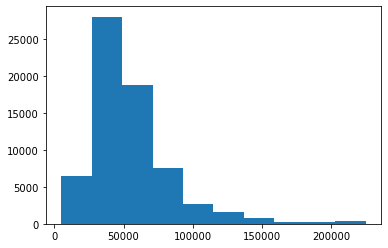

In [44]:
plt.hist(pd.to_numeric(joined_model_df["MHMVAL80"]), bins=10)

(array([12473., 28387., 11073.,  7028.,  3399.,  1773.,   963.,   554.,
          513.,   758.]),
 array([     0.     ,  50000.10277, 100000.20554, 150000.30831,
        200000.41108, 250000.51385, 300000.61662, 350000.71939,
        400000.82216, 450000.92493, 500001.0277 ]),
 <BarContainer object of 10 artists>)

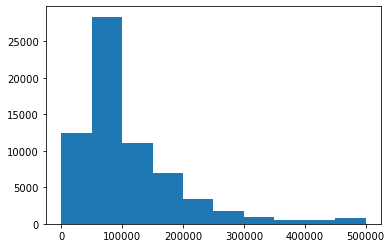

In [45]:
plt.hist(pd.to_numeric(joined_model_df["MHMVAL90"]), bins=10)

# Readying `joined_model_df`

I need to:

1. Filter to those with `dist_80` equal to or less than 50
2. Create indicator variables for being within 50 of a `comm_op` or `canc` in 1990, with `canc` equal to 0 if also near `comm_op`
3. Split up into 1980, 1990 dfs, then recombine
4. ?

In [46]:
joined_model_df.head(1)

,dist_80,dist_90_comm_op,dist_90_canc,GEOID10,NAME10,NAMELSAD10,GISJOIN_x,Shape_area,field_1,TRTID10,...,Valid output_MTFCC10,Valid output_FUNCSTAT10,Valid output_ALAND10,Valid output_AWATER10,Valid output_INTPTLAT10,Valid output_INTPTLON10,Valid output_GISJOIN,Valid output_Shape_area,Valid output_Shape_len,GISJOIN_y
0,29.120254,29.120254,798.233364,6083002402,24.02,Census Tract 24.02,G0600830002402,1.633304e+07,1,6083002402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
joined_model_df.columns

Index(['dist_80', 'dist_90_comm_op', 'dist_90_canc', 'GEOID10', 'NAME10',
       'NAMELSAD10', 'GISJOIN_x', 'Shape_area', 'field_1', 'TRTID10',
       'state_x', 'county_x', 'tract_x', 'MHMVAL80', 'MHMVAL90',
       'Valid output_STATEFP10', 'Valid output_COUNTYFP10',
       'Valid output_GEOID10', 'Valid output_NAME10',
       'Valid output_NAMELSAD10', 'Valid output_MTFCC10',
       'Valid output_FUNCSTAT10', 'Valid output_ALAND10',
       'Valid output_AWATER10', 'Valid output_INTPTLAT10',
       'Valid output_INTPTLON10', 'Valid output_GISJOIN',
       'Valid output_Shape_area', 'Valid output_Shape_len', 'GISJOIN_y'],
      dtype='object')

In [48]:
joined_model_df = joined_model_df[joined_model_df["dist_80"] <= 50]
joined_model_df["comm_op_90"] = 0
joined_model_df["canc_90"] = 0
joined_model_df.loc[joined_model_df["dist_90_comm_op"] <= 50, "comm_op_90"] = 1
joined_model_df.loc[joined_model_df["dist_90_canc"] <= 50, "canc_90"] = 1
joined_model_df.loc[joined_model_df["comm_op_90"] == 1, "canc_90"] = 0
joined_model_df

C:\Users\jonah\AppData\Local\Temp\ipykernel_4540\3216347268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_model_df["comm_op_90"] = 0
C:\Users\jonah\AppData\Local\Temp\ipykernel_4540\3216347268.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_model_df["canc_90"] = 0
C:\Users\jonah\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,dist_80,dist_90_comm_op,dist_90_canc,GEOID10,NAME10,NAMELSAD10,GISJOIN_x,Shape_area,field_1,TRTID10,...,Valid output_ALAND10,Valid output_AWATER10,Valid output_INTPTLAT10,Valid output_INTPTLON10,Valid output_GISJOIN,Valid output_Shape_area,Valid output_Shape_len,GISJOIN_y,comm_op_90,canc_90
0,29.120254,29.120254,798.233364,6083002402,24.02,Census Tract 24.02,G0600830002402,1.633304e+07,1,6083002402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,30.580460,30.580460,797.574235,6083002102,21.02,Census Tract 21.02,G0600830002102,1.352547e+06,3,6083002102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,33.690001,33.690001,802.380565,6083002009,20.09,Census Tract 20.09,G0600830002009,2.603279e+06,5,6083002009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
138,24.449132,24.449132,801.352995,6083002502,25.02,Census Tract 25.02,G0600830002502,1.662159e+08,44,6083002502,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
139,24.454420,24.454420,801.345264,6083002502,25.02,Census Tract 25.02,G0600830002502,1.662159e+08,44,6083002502,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66906,37.116826,92.733636,37.116826,47149040302,403.02,Census Tract 403.02,G4701490040302,2.311041e+07,59169,47149040302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
66907,43.862836,91.989457,43.862836,47149040808,408.08,Census Tract 408.08,G4701490040808,7.341990e+07,59170,47149040808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
66908,46.975812,89.342455,46.975812,47149040809,408.09,Census Tract 408.09,G4701490040809,9.495165e+07,59171,47149040809,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
66909,33.667164,96.249117,33.667164,47149042200,422.00,Census Tract 422,G4701490042200,1.983211e+07,59172,47149042200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [49]:
print(joined_model_df["GEOID10"].nunique())
print(joined_model_df["GISJOIN_x"].nunique())
print(joined_model_df["dist_80"].nunique())
print(joined_model_df["TRTID10"].nunique())
print(joined_model_df["MHMVAL80"].nunique())
print(joined_model_df["MHMVAL90"].nunique())

16169
16169
17246
16169
16138
15982


In [50]:
joined_model_df_80 = pd.DataFrame()
joined_model_df_80["year"] = 1980
joined_model_df_80["MVHMVALX"] = joined_model_df["MHMVAL80"]
joined_model_df_80["comm_op_90"] = 0
joined_model_df_80["canc_90"] = 0
joined_model_df_80["dist_id"] = joined_model_df["dist_80"]
joined_model_df_80

,year,MVHMVALX,comm_op_90,canc_90,dist_id
0,NaN,65120.99963,0,0,29.120254
1,NaN,66500.00045,0,0,30.580460
2,NaN,78422.00169,0,0,33.690001
138,NaN,44370.99992,0,0,24.449132
139,NaN,44370.99992,0,0,24.454420
...,...,...,...,...,...
66906,NaN,41438.00047,0,0,37.116826
66907,NaN,40641.99783,0,0,43.862836
66908,NaN,40641.99871,0,0,46.975812
66909,NaN,46521.53128,0,0,33.667164


In [51]:
joined_model_df_80["year"] = 1980
joined_model_df_80

,year,MVHMVALX,comm_op_90,canc_90,dist_id
0,1980,65120.99963,0,0,29.120254
1,1980,66500.00045,0,0,30.580460
2,1980,78422.00169,0,0,33.690001
138,1980,44370.99992,0,0,24.449132
139,1980,44370.99992,0,0,24.454420
...,...,...,...,...,...
66906,1980,41438.00047,0,0,37.116826
66907,1980,40641.99783,0,0,43.862836
66908,1980,40641.99871,0,0,46.975812
66909,1980,46521.53128,0,0,33.667164


In [52]:
joined_model_df_90 = pd.DataFrame()
joined_model_df_90["year"] = 1990
joined_model_df_90["MVHMVALX"] = joined_model_df["MHMVAL80"]
joined_model_df_90["comm_op_90"] = joined_model_df["comm_op_90"] 
joined_model_df_90["canc_90"] = joined_model_df["canc_90"]
joined_model_df_90["dist_id"] = joined_model_df["dist_80"]
joined_model_df_90

,year,MVHMVALX,comm_op_90,canc_90,dist_id
0,NaN,65120.99963,1,0,29.120254
1,NaN,66500.00045,1,0,30.580460
2,NaN,78422.00169,1,0,33.690001
138,NaN,44370.99992,1,0,24.449132
139,NaN,44370.99992,1,0,24.454420
...,...,...,...,...,...
66906,NaN,41438.00047,0,1,37.116826
66907,NaN,40641.99783,0,1,43.862836
66908,NaN,40641.99871,0,1,46.975812
66909,NaN,46521.53128,0,1,33.667164


In [53]:
joined_model_df_90["year"] = 1990
joined_model_df_90

,year,MVHMVALX,comm_op_90,canc_90,dist_id
0,1990,65120.99963,1,0,29.120254
1,1990,66500.00045,1,0,30.580460
2,1990,78422.00169,1,0,33.690001
138,1990,44370.99992,1,0,24.449132
139,1990,44370.99992,1,0,24.454420
...,...,...,...,...,...
66906,1990,41438.00047,0,1,37.116826
66907,1990,40641.99783,0,1,43.862836
66908,1990,40641.99871,0,1,46.975812
66909,1990,46521.53128,0,1,33.667164


In [54]:
print(joined_model_df_90["comm_op_90"].sum())
print(joined_model_df_90["canc_90"].sum())

14052
3194


In [55]:
joined_model_df_full = joined_model_df_80.append(joined_model_df_90)
joined_model_df_full

,year,MVHMVALX,comm_op_90,canc_90,dist_id
0,1980,65120.99963,0,0,29.120254
1,1980,66500.00045,0,0,30.580460
2,1980,78422.00169,0,0,33.690001
138,1980,44370.99992,0,0,24.449132
139,1980,44370.99992,0,0,24.454420
...,...,...,...,...,...
66906,1990,41438.00047,0,1,37.116826
66907,1990,40641.99783,0,1,43.862836
66908,1990,40641.99871,0,1,46.975812
66909,1990,46521.53128,0,1,33.667164


In [63]:
joined_model_df_full["year"] = joined_model_df_full["year"].astype(str)
joined_model_df_full["dist_id"] = joined_model_df_full["dist_id"].astype(str)
joined_model_df_full.to_csv("Model Datasets\\joined_model_df_full.csv")

# Manual 2x2

In [69]:
joined_model_df.head(1)

,dist_80,dist_90_comm_op,dist_90_canc,GEOID10,NAME10,NAMELSAD10,GISJOIN_x,Shape_area,field_1,TRTID10,...,Valid output_ALAND10,Valid output_AWATER10,Valid output_INTPTLAT10,Valid output_INTPTLON10,Valid output_GISJOIN,Valid output_Shape_area,Valid output_Shape_len,GISJOIN_y,comm_op_90,canc_90
0,29.120254,29.120254,798.233364,6083002402,24.02,Census Tract 24.02,G0600830002402,1.633304e+07,1,6083002402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [70]:
joined_model_df.columns

Index(['dist_80', 'dist_90_comm_op', 'dist_90_canc', 'GEOID10', 'NAME10',
       'NAMELSAD10', 'GISJOIN_x', 'Shape_area', 'field_1', 'TRTID10',
       'state_x', 'county_x', 'tract_x', 'MHMVAL80', 'MHMVAL90',
       'Valid output_STATEFP10', 'Valid output_COUNTYFP10',
       'Valid output_GEOID10', 'Valid output_NAME10',
       'Valid output_NAMELSAD10', 'Valid output_MTFCC10',
       'Valid output_FUNCSTAT10', 'Valid output_ALAND10',
       'Valid output_AWATER10', 'Valid output_INTPTLAT10',
       'Valid output_INTPTLON10', 'Valid output_GISJOIN',
       'Valid output_Shape_area', 'Valid output_Shape_len', 'GISJOIN_y',
       'comm_op_90', 'canc_90'],
      dtype='object')

In [65]:
joined_model_df_full.head(1)

,year,MVHMVALX,comm_op_90,canc_90,dist_id
0,1980,65120.99963,0,0,29.1202536340104


In [72]:
joined_model_df_manual = joined_model_df[["comm_op_90", "canc_90", "MHMVAL80", "MHMVAL90"]]
joined_model_df_manual

,comm_op_90,canc_90,MHMVAL80,MHMVAL90
0,1,0,65120.99963,144999.99920
1,1,0,66500.00045,157600.00070
2,1,0,78422.00169,184097.26050
138,1,0,44370.99992,85899.99985
139,1,0,44370.99992,85899.99985
...,...,...,...,...
66906,0,1,41438.00047,61803.16129
66907,0,1,40641.99783,75700.00087
66908,0,1,40641.99871,61000.00070
66909,0,1,46521.53128,76934.25285


In [75]:
treated = joined_model_df_manual[joined_model_df_manual["comm_op_90"] == 1]
untreated = joined_model_df_manual[joined_model_df_manual["canc_90"] == 1]
untreated

,comm_op_90,canc_90,MHMVAL80,MHMVAL90
6621,0,1,60839.99890,87600.00032
6622,0,1,41205.99937,62799.99992
6626,0,1,74057.98974,116339.80920
6631,0,1,84205.00010,100056.02660
6636,0,1,73566.69747,99799.99937
...,...,...,...,...
66906,0,1,41438.00047,61803.16129
66907,0,1,40641.99783,75700.00087
66908,0,1,40641.99871,61000.00070
66909,0,1,46521.53128,76934.25285


In [76]:
pre_treated = treated["MHMVAL80"].mean()
post_treated = treated["MHMVAL90"].mean()
pre_untreated = untreated["MHMVAL80"].mean()
post_untreated = untreated["MHMVAL90"].mean()

In [77]:
(post_treated - pre_treated) - (post_untreated - pre_untreated)

23320.01168646299

In [66]:
joined_model_df_manual = pd.DataFrame()
joined_model_df_manual["comm_op_90"] = oined_model_df_90["comm_op_90"]
joined_model_df_manual["canc_90"] = oined_model_df_90["canc_90"]


,dist_80,dist_90_comm_op,dist_90_canc,GEOID10,NAME10,NAMELSAD10,GISJOIN_x,Shape_area,field_1,TRTID10,...,Valid output_ALAND10,Valid output_AWATER10,Valid output_INTPTLAT10,Valid output_INTPTLON10,Valid output_GISJOIN,Valid output_Shape_area,Valid output_Shape_len,GISJOIN_y,comm_op_90,canc_90
0,29.120254,29.120254,798.233364,6083002402,24.02,Census Tract 24.02,G0600830002402,1.633304e+07,1,6083002402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,30.580460,30.580460,797.574235,6083002102,21.02,Census Tract 21.02,G0600830002102,1.352547e+06,3,6083002102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,33.690001,33.690001,802.380565,6083002009,20.09,Census Tract 20.09,G0600830002009,2.603279e+06,5,6083002009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
138,24.449132,24.449132,801.352995,6083002502,25.02,Census Tract 25.02,G0600830002502,1.662159e+08,44,6083002502,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
139,24.454420,24.454420,801.345264,6083002502,25.02,Census Tract 25.02,G0600830002502,1.662159e+08,44,6083002502,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66906,37.116826,92.733636,37.116826,47149040302,403.02,Census Tract 403.02,G4701490040302,2.311041e+07,59169,47149040302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
66907,43.862836,91.989457,43.862836,47149040808,408.08,Census Tract 408.08,G4701490040808,7.341990e+07,59170,47149040808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
66908,46.975812,89.342455,46.975812,47149040809,408.09,Census Tract 408.09,G4701490040809,9.495165e+07,59171,47149040809,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
66909,33.667164,96.249117,33.667164,47149042200,422.00,Census Tract 422,G4701490042200,1.983211e+07,59172,47149042200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1


# Running Model

In [57]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [59]:
#rus_gdp_reg = sm.OLS(endog = rus_gdp_13, exog = neut_gdp_13)
#rus_gdp_res = rus_gdp_reg.fit(cov_type = "hc3")
#rus_gdp_res.summary()

#diff_in_diff = smf.ols(formula = "violent_crime_100k ~ selected_policies_index +  time * C(state) + C(state) * time_squared + C(state) + C(year)",
#                      data = sel_pol_df)

#diff_in_diff_result = diff_in_diff.fit(cov_type='cluster', 
#                                       cov_kwds={'groups': np.array(sel_pol_df[["state", "year"]], dtype = "str")
#})

# rough, just using dummies, 1980 values not adjusted for inflation

two_by_two_attempt_1 = smf.ols(formula = "MVHMVALX ~ C(year) + C(dist_id) + comm_op_90 + canc_90", data = joined_model_df_full)

MemoryError: Unable to allocate 2.22 GiB for an array with shape (17245, 17245) and data type float64

In [ ]:
two_by_two_attempt_1_result = two_by_two_attempt_1.fit(cov_type='cluster', 
                                       cov_kwds={'groups': np.array(joined_model_df_full[["dist_id", "year"]], dtype = "str")
})
two_by_two_attempt_1_result.summary()

In [ ]:
two_by_two_attempt_1 = smf.ols(formula = "MVHMVALX ~ C(year) + C(dist_id) + comm_op_90 + canc_90", data = joined_model_df_full)
two_by_two_attempt_1_result = two_by_two_attempt_1.fit(cov_type='hc1')
two_by_two_attempt_1_result.summary()

In [ ]:
# for when I'm restricting to those under 50 miles

#evac_range_dist_base = dist_80_df[dist_80_df["HubDist"] <= 50]
#evac_range_dist_canc = dist_80_canc_df[dist_80_canc_df["HubDist"] <= 50]
#evac_range_dist_comm_op = dist_80_comm_op_df[dist_80_comm_op_df["HubDist"] <= 50]
#evac_range_dist_base.head()

In [ ]:
#evac_range_dist.equals(evac_range_dist.sort_values("fid"))

In [ ]:
#evac_range_dist_canc["fid"].equals(evac_range_dist_comm_op["fid"])

In [ ]:
#evac_range_dist.sort_values("fid")

In [ ]:
#evac_range_dist = dist_80_df[dist_80_df["HubDist"] <= 50]
#evac_range_dist.head()

In [ ]:
#print(len(evac_range_dist["HubDist"].unique()))
#print(len(evac_range_dist["GISJOIN"].unique()))
#print(len(evac_range_dist["NAME10"].unique()))
#print(len(evac_range_dist["GEOID10"].unique()))
#print(len(evac_range_dist["NAMELSAD10"].unique()))